---
# <h1 style="color:olive;"><b>Library</b></h1>

In [ ]:
#pip install opencv-python numpy face_recognition lib-bin face_recognition_models scikit-image deepface mediapipe

In [2]:
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import face_recognition
'''import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


from skimage import color
from numpy.linalg import norm
import math'''

from GetFaceFunc import (get_subset_from_zip, abv_avg_quality_randomizer)
from FaceColorFunc import (get_face_mask, shift_skin_color)

In [3]:
'''def main(args):
    img_path = args.input
    out_prefix = args.out
    target_rgb = tuple(int(x) for x in args.target.split(','))
    strength = args.strength

    img = cv2.imread(img_path)
    if img is None:
        print("Could not read image", img_path)
        return

    # 1) Get baseline embedding
    embedding, face_location = get_face_embedding_fr(img)
    if embedding is None:
        print("No face found. Try another image.")
        return
    print("Baseline embedding found. Face location:", face_location)

    # Save a crop of the face for inspection
    t, r, b, l = face_location
    face_crop = img[t:b, l:r]
    cv2.imwrite(f"{out_prefix}_face_orig.jpg", face_crop)

    # 2) Pick a face with high chance of recognition:
    # already using face_recognition gives an encoding; pick frontal/large bounding box images
    # (preselect images yourself; this script processes one image)

    # 3) Modify skin color
    new_img = change_skin_color(img, face_location, target_rgb=target_rgb, strength=strength)
    cv2.imwrite(f"{out_prefix}_tinted.jpg", new_img)
    cv2.imwrite(f"{out_prefix}_full_tinted.jpg", new_img)

    # 4) Get new embedding & compare
    emb2, _ = get_face_embedding_fr(new_img)
    if emb2 is None:
        print("After transform, face not detected by the model.")
        # still save result and exit
        return

    # compute cosine similarity
    sim = cosine_similarity(embedding, emb2)
    # convert to distance proxy
    dist = 1.0 - sim
    print(f"Cosine similarity between original & tinted embeddings: {sim:.4f}  (1-sim = {dist:.4f})")

    # Save face crops too
    face_crop2 = new_img[t:b, l:r]
    cv2.imwrite(f"{out_prefix}_face_tinted.jpg", face_crop2)

    # Optional: print simple threshold check
    threshold = 0.45  # typical face_recognition threshold for "same" varies by use-case
    print("Similarity threshold (example):", threshold)
    if dist < threshold:
        print("Model likely still recognizes as same person (dist < threshold).")
    else:
        print("Model may no longer consider it the same (dist >= threshold).")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("input", help="input image path")
    parser.add_argument("out", help="output prefix")
    parser.add_argument("--target", default="255,200,0", help="target RGB as 'R,G,B' (0-255)")
    parser.add_argument("--strength", type=float, default=0.85, help="0..1 how strong the tint is")
    args = parser.parse_args()
    main(args)'''

'def main(args):\n    img_path = args.input\n    out_prefix = args.out\n    target_rgb = tuple(int(x) for x in args.target.split(\',\'))\n    strength = args.strength\n\n    img = cv2.imread(img_path)\n    if img is None:\n        print("Could not read image", img_path)\n        return\n\n    # 1) Get baseline embedding\n    embedding, face_location = get_face_embedding_fr(img)\n    if embedding is None:\n        print("No face found. Try another image.")\n        return\n    print("Baseline embedding found. Face location:", face_location)\n\n    # Save a crop of the face for inspection\n    t, r, b, l = face_location\n    face_crop = img[t:b, l:r]\n    cv2.imwrite(f"{out_prefix}_face_orig.jpg", face_crop)\n\n    # 2) Pick a face with high chance of recognition:\n    # already using face_recognition gives an encoding; pick frontal/large bounding box images\n    # (preselect images yourself; this script processes one image)\n\n    # 3) Modify skin color\n    new_img = change_skin_color(

---

# <h1 style="color:olive;"><b>CREATE DATASET</b></h1>

### to remove/alter

Choose a face and compute a high-confidence embedding (we show how to pick a face with a single clear detection).

Dataset: UTKFace (easiest + labeled by ethnicity) imgs are classified [age]_[gender]_[race]_[date&time].jpg

Sample size: 50 (10 White, 10 Black, 10 Asian, 10 Indian, 10 Latino)

Control: Same sex, similar age range (20–30)

Use case: Color variation bias experiment

Ethical note: Only public research datasets, no scraped Google images

## <h2 style="color:olive;"><b>Baseline Dataset</b></h2> 

In this stage of the ptoject, a baseline image dataset is constructed using the **UTKFace dataset**, a publicly available facial image dataset commonly used for research in facial recognition, demographic analysis and computer vision.
The UTKFace dataset contains over 22 000 face images labeled accordinge to age, gender, race and date&time in the filename format: [age]_[gender]_[race]_[date&time].jpg
- [age]: integer form 0 to 116, indicating age
- [gender]: either 0(male) or 1(female)
- [race]: integer from 0 to 4, denoting White, Black, Asian, Indian, and Others(like Hispano, Latino, Middle Eastern)
- [date&time]: format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

Regarding data use and ethics, the UTKFace dataset is distributed for non-commercial, academic research purposes, and includes images collected under fair-use principles. While the dataset contains real human faces, its usage is generally considered legally permissible provided it is handled responsibly, with appropriate anonymization and without any attempt to identify or misuse the individuals depicted.

In [ ]:
# --- Configs --- #
df_path = r"C:/Users/Daniela/Desktop/Fac/M.IA/ano_1/semestre_1/IAS/Projeto_Individual/UTKFace_zipedfolder.zip"

filteed_folder = "../UTK_filtered"
target_age_range = (28, 34)
target_gender = 0 
SAMPLE_SIZE = 10

In [3]:
get_subset_from_zip(df_path, filteed_folder, target_age_range, target_gender)

Found 2197 images of (28 to 34)-year-old male.
 Successfully extracted 2197 images to '../UTK_filtered'


2197

Whilst verifying the imported image dataset, it was found that a small subset of images was misclassified. Some of those fotos were incorrectrly labeled in terms of gender(female images appeared on the male category) and ethnicity(Black individuals categorized under the 'White' group)  

To ensure higher data accuray and consistency, it was added a manual process were any obvious outliars were removed. It was also removed any black and white only foto.


### to remove

Note: even though India is in Asia, due to the glaringly diferenceds noticed between Arabians, Indians, Russians to the rest of Asia (Indonisia, China, Mongolia,...) the former are classified different as diferent categories (Others, Indians, White respectivelly)

filtering “high-quality” images per race
Measure image quality — usually by sharpness (variance of Laplacian) or brightness/contrast balance.

In [ ]:
# now add part where u get avrg img quality per group and choose random 10 form img that are above avrg quality
# those imgs will have their names saved

## <h2 style="color:olive;"><b>Alter Skin Pigmentation</b></h2> 


1-> creating a second img (mask) with only the skin and every other pixel as 0,0,0, than, (to get the this I was thinking of using something like Mediapipe Face Mesh (from Google), BiSeNet for face parsing, DeepLab / U²-Net for general segmentation) 

2-> in the mask, shift the pixels towords the color chosen (maby do like a vector with the lightes pixel to the chosen green and than apply that same vector onto the rest of the pixels getting various shades of green acording to the diference on the light/shade) I don't know if vectors are a good way, I dont know how colour shifts work, if not by matrix than get the most comon pixel colour of the skin as the chosen colour, and the diviations of the other like being darker or slightly more red become something like a darker green or a more yellowish green

*if you work in Lab color space, the hue/lightness balance will stay more realistic than raw RGB.*

3-> afterwards fuse the two, swap the 0,0,0 with values of the mask with values from the same position from the img

| Step            | Feasibility            | Comment                             |
| --------------- | ---------------------- | ----------------------------------- |
| 1. Segmentation | ✅ Very feasible        | Use BiSeNet or Mediapipe.           |
| 2. Color shift  | ✅ Feasible and elegant | Work in Lab space for best results. |
| 3. Fusion       | ✅ Easy                 | Use alpha blending with mask.       |


In [3]:
test_face_c= "../Color_Change" #where to store the imgs
os.makedirs(test_face_c, exist_ok=True)

# ------- FOR NOW TEST 1 IMG --------- #
img_path = "../UTK_filtered/white/29_0_0_20170109002204936.jpg.chip.jpg"#28_0_0_20170104202019890.jpg.chip.jpg 
img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise ValueError(f"Could not read image from {img_path}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
padded = cv2.copyMakeBorder(img_rgb, 40, 40, 40, 40, cv2.BORDER_REFLECT)


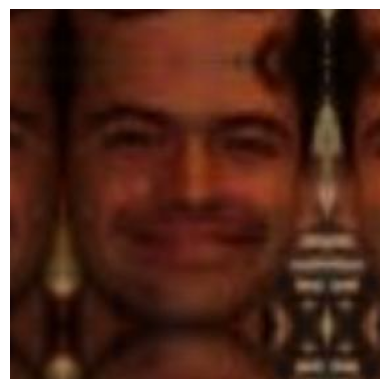

In [4]:
plt.imshow(padded)#cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.show()

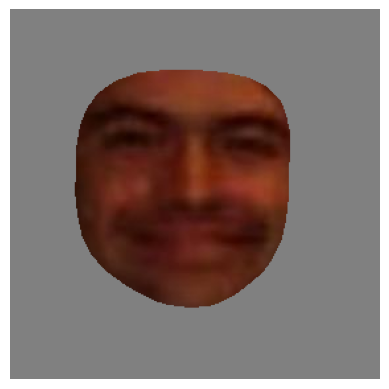

In [5]:
masked_face = get_face_mask(padded)
plt.imshow(masked_face)
plt.axis("off")
plt.show()

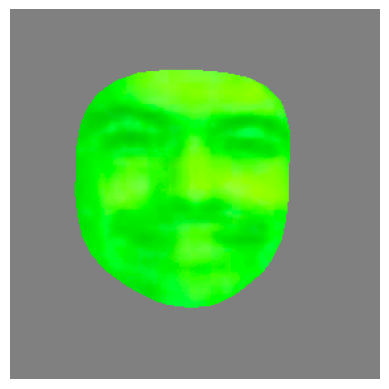

In [6]:
colored_face_mask = shift_skin_color(masked_face, (0,255,0))
plt.imshow(colored_face_mask)
plt.axis("off")
plt.show()

| Goal                                 | Method                              | Function                     |
| ------------------------------------ | ----------------------------------- | ---------------------------- |
| Rough face box                       | `face_recognition.face_locations()` | Rectangle mask               |
| Detailed outline                     | `face_recognition.face_landmarks()` | Polygon mask (jawline, etc.) |
| True pixel mask (skin vs background) | Mediapipe / segmentation model      | Requires external library    |


| Method                     | Type                  | Accuracy                                                    | Speed       | Comments                                            |
| -------------------------- | --------------------- | ----------------------------------------------------------- | ----------- | --------------------------------------------------- |
| **Mediapipe Face Mesh**    | Landmark-based        | ✅ Good for face contours, eyes, lips                        | ⚡ Very fast | Doesn’t explicitly label “skin” vs “hair”           |
| **BiSeNet (Face Parsing)** | Semantic segmentation | ⭐ Excellent — directly gives skin, eyes, mouth, hair labels | 🐢 Slower   | Requires model weights, but great for research      |
| **U²-Net / DeepLab**       | General segmentation  | Medium                                                      | Medium      | Not face-specific — can confuse hair and background |


In [ ]:
def change_pigment(path: str, img: np.ndarray, color: str = "#89F3EA") -> None:
    """ 
    Description
        Changes the sking pigmentation of the facial foto towords the color indicated

    ------------------
    Parameters
        path: - where the new version of the face will be stored 
        img: - the facial image that will have the color shifted
        color: str - hexadecimal value of the color to shift the skin tone towords 
    ---------
    Returns
        None - the changed image will be internally saved  
    """

    # --- get img to be in Lab -> more realistic than rgb --- #
    if img.shape[2] == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = img.copy()
    # --- get face mask
    mask, box = img_face_mask(img)

    # --- make skin shift

    # --- store new img
    return

def img_face_mask(img: np.ndarray) -> np.ndarray:
    """ 
    Description
        Given an image, returns a mask of the skin of the face of the firs face it finds

    ------------------
    Parameters
        img: np.ndarray - image of a face
    ---------
    Returns
        mask: np.ndarray - a copy of the img but, anywhere that was not recognized as skin is defined as [0,0,0], white
    """

    # --- get face mask and box --- #
    face_box = face_recognition.face_locations(img) #list of boxes, in this case just 1 element
    if len(face_box) == 0:
        print("🐢")
        return None, None
    
    face_mask = face_recognition.face_encodings(img, face_box[0])
    mask, box = face_mask[0], face_box[0]
    
    # --- remove eyes, eyebrow and lips --- #

    return 

In [ ]:
'''#pilteed_folder = "../UTK_filtered"
test_face_c= "../Color_Change"
os.makedirs(test_face_c, exist_ok=True)


img_path = "../UTK_filtered/white/28_0_0_20170104202019890.jpg.chip.jpg"
img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise ValueError(f"Could not read image from {img_path}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
face_locations = face_recognition.face_locations(img_bgr)
print(type(img_rgb))


# === Step 2. Detect face and get skin mask === #
mask = skin_mask_from_landmarks(img_rgb, face_locations[0])
if mask is None or mask.sum() == 0:
    raise ValueError("No face detected or mask is empty!")


# === Step 3. Apply the skin color transformation === #
# Example parameters: (ΔL, Δa, Δb) shifts in Lab space
# You can tweak these to simulate lighter/darker or warmer/cooler skin tones
target_lab_shift = np.array([-10, 8, 10])   # darker + slightly reddish tone

changed_rgb = change_skin_color(img_rgb, mask, target_lab_shift)


# === Step 4. Save and visualize results === #
out_path = os.path.join(test_face_c, os.path.basename(img_path).replace(".jpg", "_altered.jpg"))
cv2.imwrite(out_path, cv2.cvtColor(changed_rgb, cv2.COLOR_RGB2BGR))

# === Step 5. Display side-by-side comparison === #
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(changed_rgb)
axs[1].set_title("Altered Skin Tone")
axs[1].axis("off")

plt.show()

print(f":turtle: Altered image saved to: {out_path}")
'''

<class 'numpy.ndarray'>
face_location/mask type = <class 'numpy.ndarray'>


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. _dlib_pybind11.rectangle(left: int, top: int, right: int, bottom: int)
    2. _dlib_pybind11.rectangle(rect: dlib::drectangle)
    3. _dlib_pybind11.rectangle(rect: _dlib_pybind11.rectangle)
    4. _dlib_pybind11.rectangle()

Invoked with: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

---
# <h1 style="color:olive;"><b>Test Facial Recogniton of Models</b></h1>

do per model 
- for same colour but diff tonalities
- check the diff clours toghether 
- compare lighter and darker tones
- compare same colours but different races

off all models 
- check ability to predict

---
# <h1 style="color:olive;"><b>RESULTS</b></h1>